# Plotting demo
Let's define a function $f(\mathbf{x}) = f(x_1, x_2) = (x_1 - 2)^2 + (x_2 - 1)^2$

In [4]:
import numpy as np

# define a function
f = lambda x: (x[..., 0]-2)**2 + (x[..., 1] - 1)**2 # function I want to plot and later optimize

In [51]:
# contour plotting
x1 = np.linspace(-5, 5, 100)
x2 = np.linspace(-5, 5, 100)
x1v, x2v = np.meshgrid(x1, x2)
x = np.column_stack( (x1v.reshape(-1, 1), x2v.reshape(-1,1) )) # will have 10,000 rows

Text(0, 0.5, 'x_2')

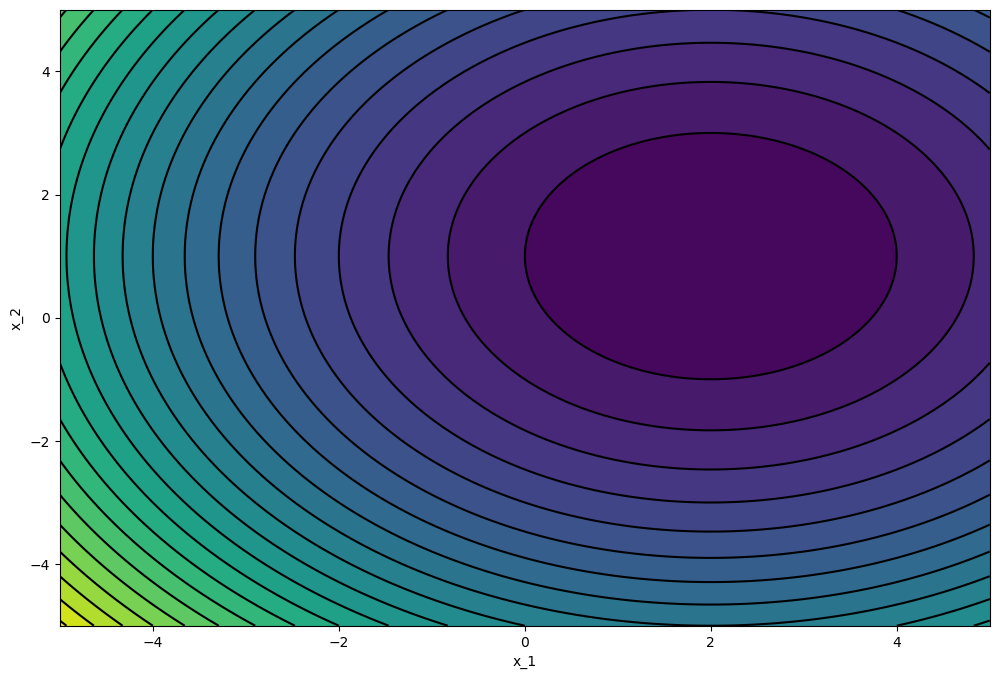

In [53]:
import matplotlib.pyplot as plt

plt.figure(figsize=[12,8])
c = plt.contour(x1v, x2v, f(x).reshape(100, 100), levels=25, colors='k')
c2 = plt.contourf(x1v, x2v, f(x).reshape(100, 100), levels=25)
plt.xlabel("x_1")
plt.ylabel("x_2")

# Computing derivatives

In [10]:
from jax import grad, hessian
import jax.numpy as jnp # this is a thin wrapper for numpy within JAX

In [12]:
x = np.array([1.0, 1.0]) # point where I want to compute gradient
gradf = grad(f)
print(f"the gradient of f(x) at x=[1, 1]  is {gradf(x)}")

the gradient of f(x) at x=[1, 1]  is [-2.  0.]


In [14]:
# Hessian
hess = hessian(f)
H = hess(x)

In [15]:
type(H)

# convert JNP optject to numpy array
H_ = np.asarray(H)

type(H_)

numpy.ndarray

# Simple unconstrained optimization loop with line search

In [74]:
x0 = np.array([-4., -4.])

ginf  = 10
eps = 1e-3

xk  = x0
gk  = grad(f)(xk)

iterates = []
fkhistory = []

maxiters = 25
k = 1

while ginf > eps and k < maxiters:

    pk = -gk / np.linalg.norm(gk) # steepest descent
    alphak = 0.2 # we assume a constant step length 
    xk = xk + alphak*pk 
    iterates.append(xk)
    fk = f(xk)
    fkhistory.append(fk)
    gk = grad(f)(xk)
    ginf = np.linalg.norm(gk, ord=np.inf) # infinity norm of gk
    print(f"iteration {k}, gradient norm {ginf} ")
    k += 1


iteration 1, gradient norm 11.692710876464844 
iteration 2, gradient norm 11.385422706604004 
iteration 3, gradient norm 11.078134536743164 
iteration 4, gradient norm 10.770845413208008 
iteration 5, gradient norm 10.463556289672852 
iteration 6, gradient norm 10.156268119812012 
iteration 7, gradient norm 9.848979949951172 
iteration 8, gradient norm 9.541690826416016 
iteration 9, gradient norm 9.23440170288086 
iteration 10, gradient norm 8.92711353302002 
iteration 11, gradient norm 8.61982536315918 
iteration 12, gradient norm 8.312536239624023 
iteration 13, gradient norm 8.005247116088867 
iteration 14, gradient norm 7.697958946228027 
iteration 15, gradient norm 7.390670299530029 
iteration 16, gradient norm 7.083381652832031 
iteration 17, gradient norm 6.776093006134033 
iteration 18, gradient norm 6.468804359436035 
iteration 19, gradient norm 6.161515712738037 
iteration 20, gradient norm 5.854227066040039 
iteration 21, gradient norm 5.546938896179199 
iteration 22, gradi

Text(0, 0.5, 'x_2')

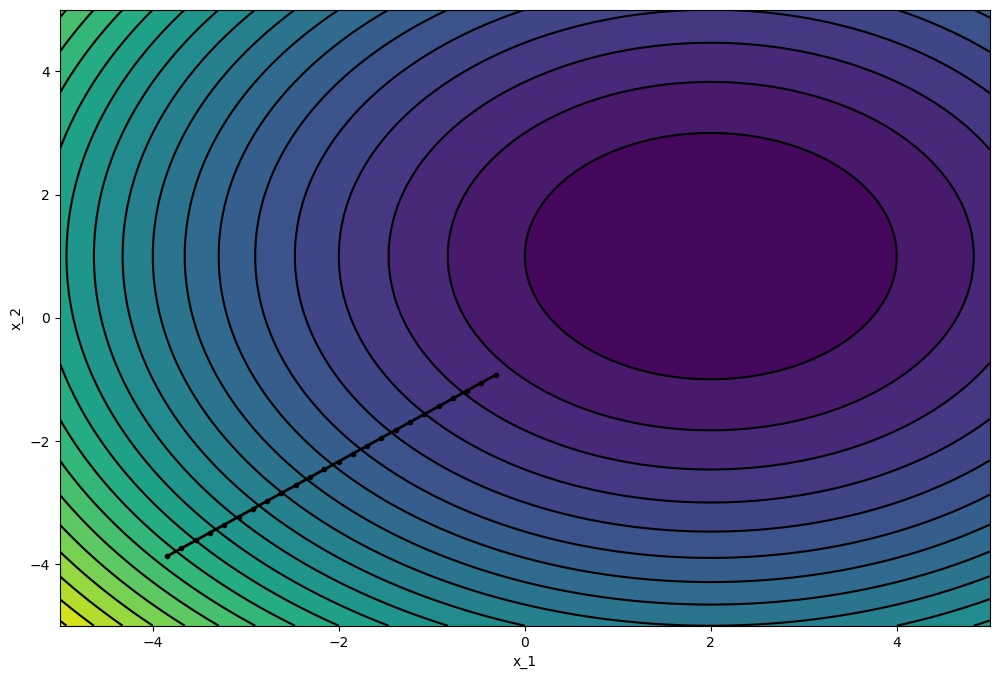

In [80]:
plt.figure(figsize=[12,8])
c = plt.contour(x1v, x2v, f(x).reshape(100, 100), levels=25, colors='k')
c2 = plt.contourf(x1v, x2v, f(x).reshape(100, 100), levels=25)

plt.plot(np.array(iterates)[:,0], np.array(iterates)[:,1], lw=2, marker='.', c='k')
plt.xlabel("x_1")
plt.ylabel("x_2")

array([[-3.8463557 , -3.871963  ],
       [-3.6927114 , -3.743926  ],
       [-3.539067  , -3.615889  ],
       [-3.3854227 , -3.487852  ],
       [-3.2317784 , -3.3598151 ],
       [-3.078134  , -3.2317781 ],
       [-2.9244897 , -3.1037412 ],
       [-2.7708454 , -2.9757042 ],
       [-2.617201  , -2.8476672 ],
       [-2.4635568 , -2.7196302 ],
       [-2.3099124 , -2.5915933 ],
       [-2.1562681 , -2.4635563 ],
       [-2.0026238 , -2.3355193 ],
       [-1.8489795 , -2.2074823 ],
       [-1.6953351 , -2.0794454 ],
       [-1.5416908 , -1.9514085 ],
       [-1.3880465 , -1.8233716 ],
       [-1.2344022 , -1.6953348 ],
       [-1.0807579 , -1.5672979 ],
       [-0.9271136 , -1.4392611 ],
       [-0.7734693 , -1.3112242 ],
       [-0.61982507, -1.1831874 ],
       [-0.4661808 , -1.0551505 ],
       [-0.31253654, -0.92711365]], dtype=float32)